In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts

In [9]:
path = 'tempo.csv'

In [10]:
df = pd.read_csv(path,sep = ';')

In [11]:
df.isna().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [12]:
df.head(3)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim


In [13]:
f = lambda T: 5*(T-32)/9
df['Temperatura'] = np.round(df['Temperatura'].apply(f),1)

<AxesSubplot:xlabel='Vento'>

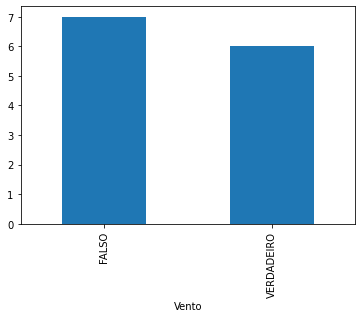

In [14]:
df.groupby(['Vento']).size().plot(kind = 'bar')

<AxesSubplot:xlabel='Aparencia'>

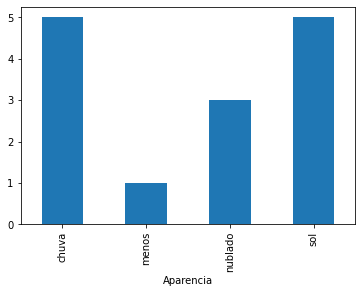

In [15]:
df.groupby(['Aparencia']).size().plot(kind = 'bar')

<AxesSubplot:xlabel='Jogar'>

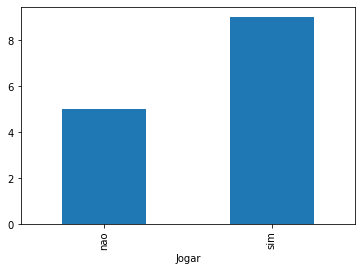

In [16]:
df.groupby(['Jogar']).size().plot(kind = 'bar')

<AxesSubplot:>

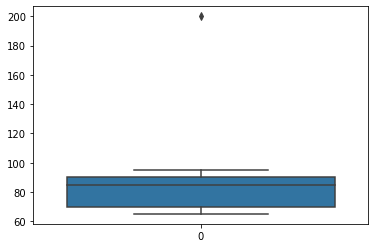

In [17]:
sns.boxplot(data = df['Umidade'])

<AxesSubplot:>

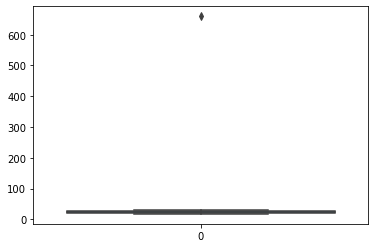

In [18]:
sns.boxplot(data = df['Temperatura'])

In [19]:
df.loc[df['Temperatura']>600,'Temperatura'] = sts.median(df['Temperatura'])

<AxesSubplot:>

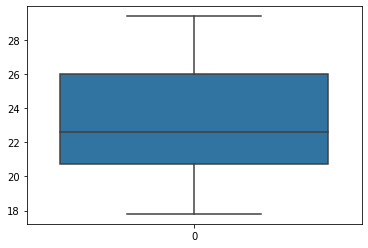

In [20]:
sns.boxplot(data = df['Temperatura'])

In [21]:
df['Umidade'].fillna(value = sts.median(df['Umidade']),inplace = True)

In [22]:
df['Vento'].fillna(value = 'FALSO',inplace = True)

In [23]:
#df.loc[df['Umidade']>100,'Umidade'] = sts.median(df['Umidade'])
q25 = np.percentile(df['Umidade'],25)
q75 = np.percentile(df['Umidade'],75)
DIQ = q75-q25
df.loc[df['Umidade']>100] = sts.median(df['Umidade'])

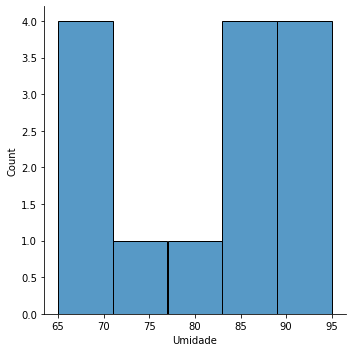

In [24]:
sns.displot(df['Umidade'])